# Scientific Python



## Classes and Objects

Classes are a smart way to organize your code. Instead of looping funtions, define a class to describe subjects, timepoints, events, etc and give the class attributes and methods.

Our first class will describe a subject in our study. Our class will be called "Subject", and it's only attribute will be the subject ID of a given subject.

In [1]:
class Subject():
    pass

In [2]:
sub1 = Subject()

In [4]:
sub1.subID = 'sub001'

In [5]:
class Subject():
    def __init__(self,subID):
        self.subID = subID
        

`__init__` is a special method. It is automatically called when the object is created. The first argument to `__init__` is always "self". "self" gives a method access to all the attributes of the object. Any other arguments are passed to the object when it is created, like when you run a subject.

With this simple class definition, we can create subject objects, pass subject IDs on creation, then access the subject ID on demand.

In [6]:
sub1 = Subject('01')

In [7]:
sub2 = Subject('02')

In [8]:
sub1.subID

'01'

In [9]:
sub2.subID

'02'

Let's expand the class to add some additional attributes, and a method which modifies those attributes

In [10]:
class Subject():
    def __init__(self,subID,data,date):
        self.subID = subID
        self.data = data
        self.date = date
        self.isclean = False
        
    def cleandata(self):
        # Set any negative values to zero
        self.data = [ 0 if x<0 else x for x in self.data ]
        self.isclean = True

In [11]:
sub3 = Subject('03',[-2,-1,0,1,2,3,4,5],'2017-08-20')

In [12]:
print(sub3.subID,sub3.data,sub3.date)

03 [-2, -1, 0, 1, 2, 3, 4, 5] 2017-08-20


In [13]:
sub3.cleandata()

In [14]:
sub3.data

[0, 0, 0, 1, 2, 3, 4, 5]

In [15]:
sub3.isclean

True

Finally, let's do some data validation. 

In the constructor, we'll check whether "data" is a list. If not we'll raise an error.

We'll also convert the "date" string into a date object that python understands.

Let's imagine that there was a calibration error for all data collected in 2016, so we need to increase all data values by 1 for dates in 2016 but not in 2017. We can add this to the cleandata() method.

In [16]:
from datetime import datetime

class Subject():
    def __init__(self,subID,data,date):
        # Check that data is a list
        if type(data) != list:
            raise ValueError("Argument data must be type 'list'")
        self.subID = subID
        self.data = data
        # Make the date attribute a python date
        self.date = datetime.strptime(date,'%Y-%m-%d')
        self.isclean = False
        
    def cleandata(self):
        # Set any negative values to zero
        self.data = [ 0 if x<0 else x for x in self.data ]
        self.isclean = True
        
        # Recalibrate data if collected in 2016
        if self.date.year == 2016:
            self.data = [x+1 for x in self.data]
            
    

First, let's make a new subject but pass the wrong type of data:

In [17]:
sub4 = Subject('04','-2,-1,0,1,2,3,4,5','2017-08-20')

ValueError: Argument data must be type 'list'

Now let's create two subjects with identical data, but with acquisition dates in different years

In [18]:
sub5 = Subject('05',[-2,-1,0,1,2,3,4,5],'2016-05-11')
sub6 = Subject('06',[-2,-1,0,1,2,3,4,5],'2017-05-11')

In [19]:
sub5.cleandata()
sub6.cleandata()

In [20]:
print('Subject {}: {}'.format(sub5.subID,sub5.data))
print('Subject {}: {}'.format(sub6.subID,sub6.data))

Subject 05: [1, 1, 1, 2, 3, 4, 5, 6]
Subject 06: [0, 0, 0, 1, 2, 3, 4, 5]


Now that our analysis is done, let's plot the data

In [21]:
%matplotlib notebook
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


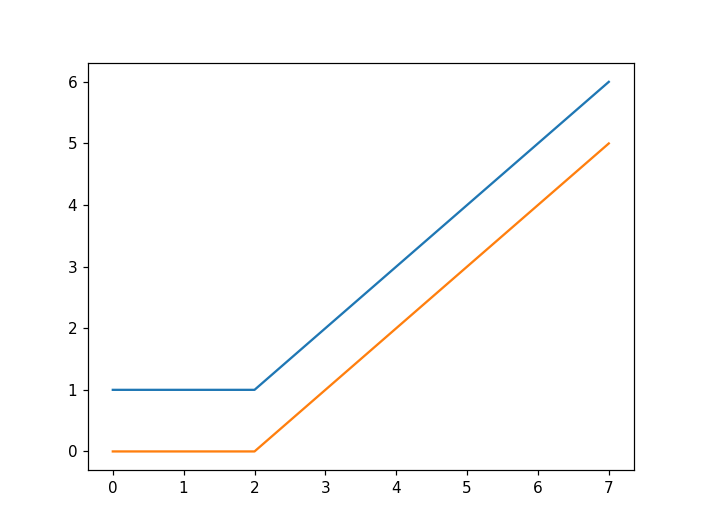

In [23]:
f,ax = plt.subplots(1)
ax.plot(sub5.data)
ax.plot(sub6.data)

## Class inheritence

Classes can inherit from each other. So, you can write a general Subject class that contains all the typical attributes of a research subject, then write a sub-class to customize it for your specific study

In [39]:
class MRISubject(Subject):
    pass

The above class inherits everything from the Subject class and adds nothing. We can do better! Let's add an attribute that's a list of scans acquired for this subject.

To do this, we need to modify the __init__ command. If we wanted, we could just write a new definition of __init__; but that would lose the work we did in the base class. Instead, we will define a new __init__ but bring in all the attributes from the base class as well.

Another change we will make is that the new attribut `scans` will be optional. We do this by assigning a default values in the __init__ definition. When this is done, the use can either set the value of scans themself or leave it blank.

In [52]:
class MRISubject(Subject):
    def __init__(self,subID,data,date,scans=None):
        # This super() function is magic. It copies in everything from the __init__ function of the base class
        super().__init__(subID,data,date)
        self.scans = scans

In [53]:
mrisub = MRISubject('09',[1,2,3,4,5],'2017-01-10',scans=['DTI','3DT1','T2GRASE'])

In [54]:
mrisub.scans

['DTI', '3DT1', 'T2GRASE']

## \*args and \*\*kwargs (optional)
We can generalize function inputs so that we don't have to type out all the inputs to the __init__ function (or any funtion) every time. Instead, we can use \*args and \*\*kwargs

```def myfunction(*args,**kwargs):
    input1 = args[0]
    ...
    opt_input1 = kwargs['key1']
    ...
```


The single star bundles up all mandatory arguments into a list called `args`. The double star bundles up all optional arguments into a dictionary called `kwargs` with key:value pairs. The actual variable names "args" and "kwargs" can be anything you want, but are used by convention. Let's use this concept to simplify our class inputs.

In [24]:
class MRISubject(Subject):
    def __init__(self,*args,**kwargs):
        # This super() function is magic. It copies in everything from the __init__ function of the base class
        super().__init__(*args)
        self.scans = kwargs['scans']

In [25]:
mrisub = MRISubject('09',[1,2,3,4,5],'2017-01-10',scans=['DTI','3DT1','T2GRASE','ASL'])

In [26]:
mrisub.scans

['DTI', '3DT1', 'T2GRASE', 'ASL']

Attributes **don't** have to be set during initialization. We can set attributes of objects at any time in our code, even if they aren't defined in the class.

Often you'll see cases where objects will be initialized with few or no arguments, then attributes are set as needed.

In [73]:
mrisub.att = 'test'

In [74]:
mrisub.att

'test'

## Exercise: Image Object

Create a class that defines a 3D image object. 
* Define a class called something like Image3D
* Write a method called "generate_image()" or similar that generates a 3D matrix of random values and assigns it as an attribute
* Write a method called "generate_mask()" that generates a 3D matrix of the same size as your first image. The mask should be all zeros except for a region of ones. Your mask can be simple or complex. Assign the mask as an attribute
* Write a method that takes the mean of the image matrix where mask values are 1

Things to think about:
* Which methods should be run automatically, and which should the user call?
* What other methods can we write?

In [113]:
class Image3D():
    pass

# Plotting with MatPlotLib

There are two ways to interact with MatPlotLib: the scripting interface (pyplot), or the object-oriented interface. Both produce the same results and are useful in different situations. This tutorial will mostly use the object-oriented technique since I like it more, but when looking things up online keep in mind that both exist

There are two main objects in MPL: The figure and the axis. Each figure is a separate image. Each axis contains one or more datasets visualizations. A figure can have any number of axes in it, but each axis belongs to a single figure.

The function `plt.subplots(n)` creates a figure with `n` axes arranged vertically. We'll start with one axis and then make it more complicated.

In [76]:
%matplotlib
from matplotlib import pyplot as plt

Using matplotlib backend: nbAgg


First, let's invent some data. Let's make 1000 evenly spaced points between 0 and 4$\pi$ on the x axis, and a cosine function as the y data:

In [84]:
xdata = np.linspace(0,4*3.14,num=1000)

In [85]:
ydata = np.cos(xdata)

Now, make the figure and axes objects and plot the data

<IPython.core.display.Javascript object>


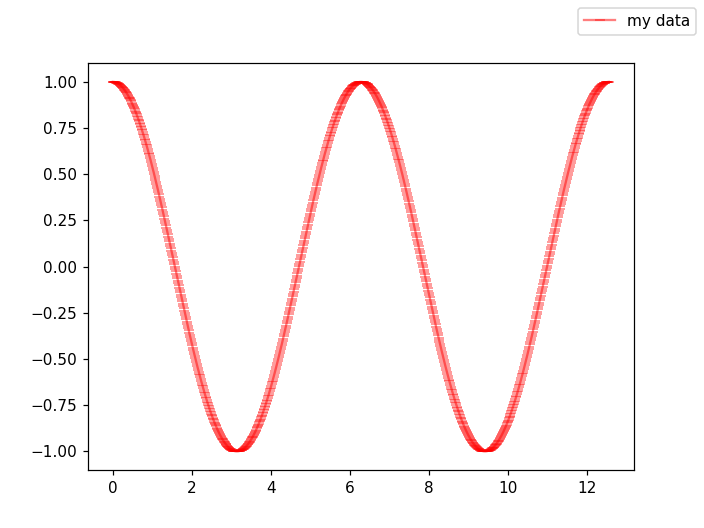

In [136]:
f, ax = plt.subplots(1)

In [137]:
cosline, = ax.plot(xdata,ydata)

So right now we have access to three major objects: The figure (`f`), the axis (`ax`), and the line (`cosline`). We can modify how the plot looks

In [138]:
cosline.set_color('red')

In [147]:
cosline.set_marker('_')

In [148]:
cosline.set_alpha(0.5)

In [149]:
ax.set_axis_off()

In [150]:
ax.set_axis_on()

In [154]:
f.legend([cosline],['my data'])

Let's start again with a new figure with 2 axes. Let's generate some random data for the second axis

In [188]:
ydata2 = np.random.random(1000)/5

<IPython.core.display.Javascript object>


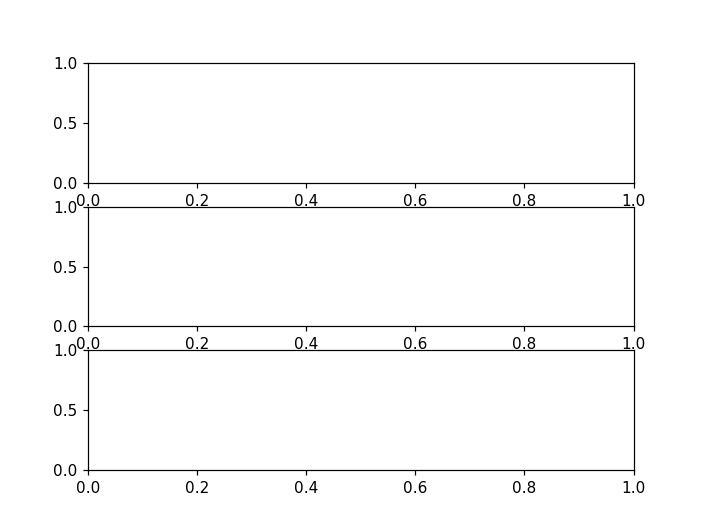

In [87]:
f,ax = plt.subplots(3,sharey=True)

Note that `ax` is now an array of axes. We access them with `ax[0]` and `ax[1]`

In [235]:
noisecosline, = ax[0].plot(xdata,ydata+ydata2)

In [236]:
cosline, = ax[1].plot(xdata,ydata,color='orange')

In [237]:
noiseline = ax[2].plot(xdata,ydata2,color='blue')

In [199]:
a.set_ylim?

We can make subplots in different arrangements simply

<IPython.core.display.Javascript object>


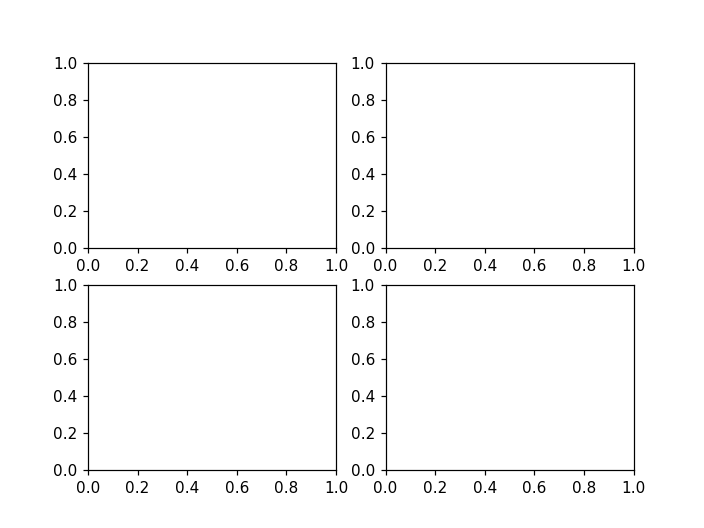

In [165]:
f,ax = plt.subplots(2,2)

Or make arrangments more complicated

<IPython.core.display.Javascript object>


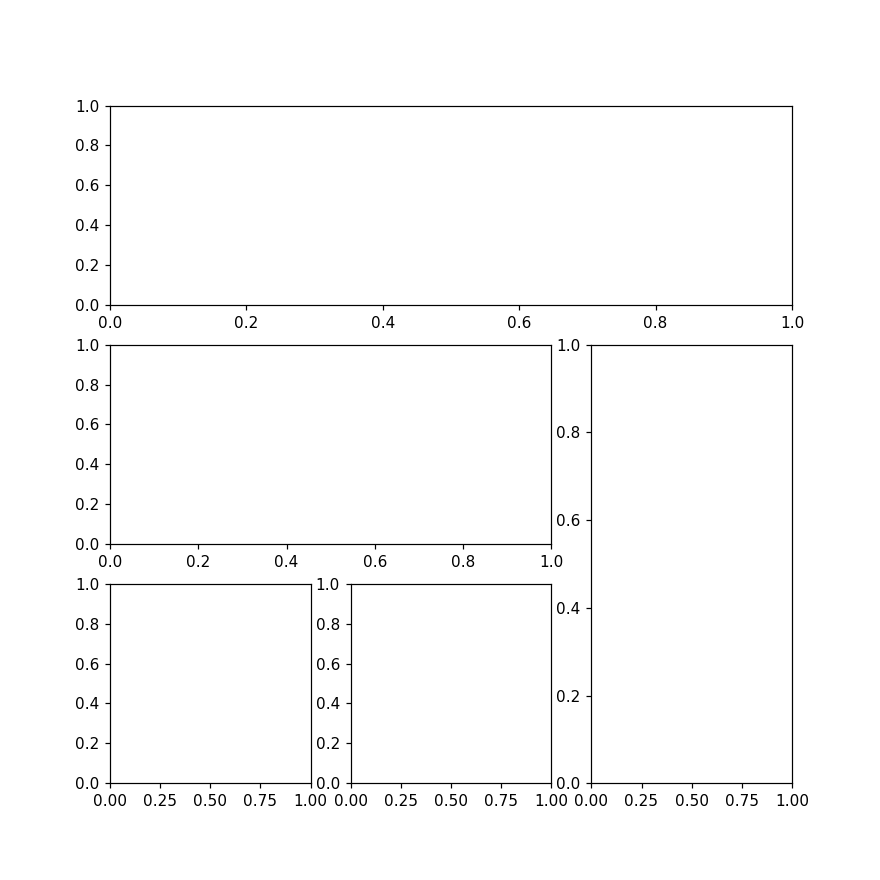

In [210]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[1:, 2])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# Curve Fitting

Let's generate an exponential decay, and add some noise to the data.

In [55]:
xdata = np.linspace(1,32,32)

In [56]:
def exp_decay(t,A,T):
    return A*np.exp(-t/T)

Set the "true" values for A and T, then generate some sample data

In [108]:
A = 10
T = 20
ydata = exp_decay(xdata,A,T)

In [109]:
ynoise = np.random.random(32)/3
ydata = ydata + ynoise

<IPython.core.display.Javascript object>


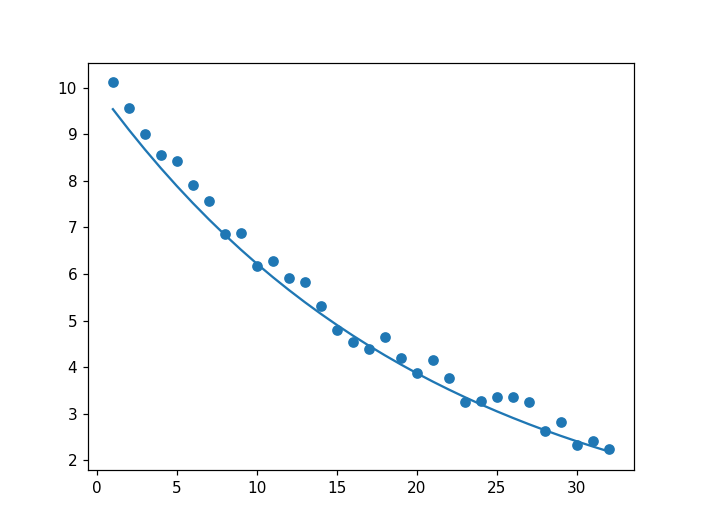

In [110]:
f,ax = plt.subplots()
ax.scatter(xdata,ydata+ynoise)

## Linear transform fit
If we know the data is exponential, it's quickest to transform the data and do a linear fit
$$ S = Ae^{\frac{-t}{T}} $$
$$ \log{S} = \log{A} - \frac{t}{T} $$
Therefore when we plot log of signal vs time, $$slope=-1/T$$

In [75]:
ydatalog = np.log(ydata)

<IPython.core.display.Javascript object>


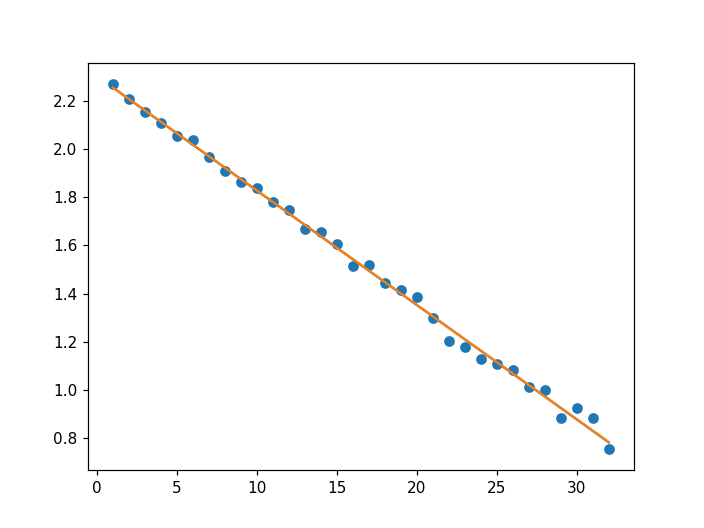

In [97]:
f2,ax2 = plt.subplots()
ax2.scatter(xdata,ydatalog)

In [99]:
m,b = np.polyfit(xdata,ydatalog,1)
m,b

(-0.047522720455900481, 2.3032296059967567)

In [105]:
ax2.plot(xdata,xdata*m+b)

In [100]:
A_measured = np.exp(b)
A_measured

10.00644720745845

In [101]:
T_measured = -1/m
T_measured

21.042566385229716

In [106]:
ydata_linfit = exp_decay(xdata,A_measured,T_measured)

In [111]:
ax.plot(xdata,ydata_linfit)

## Exercise: curve_fit
Use `scipy.optimize.curve_fit()` to fit the same ydata directly to the exponential decay function that we defined

In [112]:
from scipy.optimize import curve_fit
curve_fit?